In [2]:
import numpy as np
import random
import math
import heapq
import multiprocess as mp
import talib as ta
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from datetime import datetime,date
import time
from island_ga import IslandGGA 
from chromosome import Chromosome 
from data_preprocessing import Data
import itertools
import yfinance as yf
import datetime

[*********************100%***********************]  1 of 1 completed


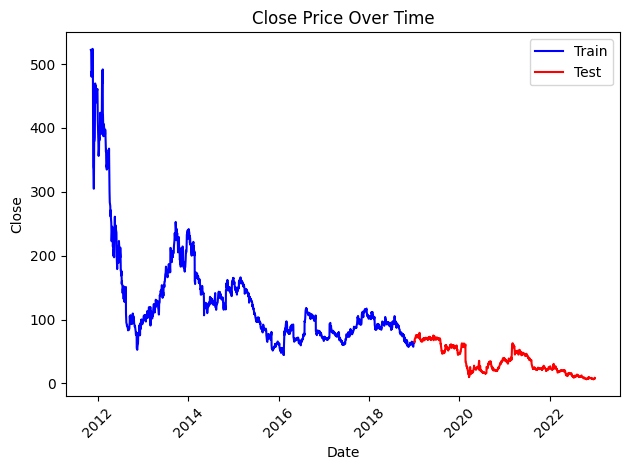

In [5]:
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2022, 12, 31)
period ="train"
data = Data('GRPN',start_date,end_date,period,2019)
data.data_preprocess()

Running ring
Generation 1: Best fitness = 1.4589396585777794  Average Fitness = 0.20080065102269726
Generation 2: Best fitness = 1.6039388861032007  Average Fitness = 0.3735552451439642
Generation 3: Best fitness = 2.2570006972748273  Average Fitness = 0.5927867372692953
Generation 4: Best fitness = 2.287570234048437  Average Fitness = 0.6289177042593497
Generation 5: Best fitness = 2.287570234048437  Average Fitness = 0.7971769344697412
Generation 6: Best fitness = 3.4992219707005767  Average Fitness = 1.03369936996947
Generation 7: Best fitness = 3.4992219707005767  Average Fitness = 1.1516611761225692
Generation 8: Best fitness = 3.4992219707005767  Average Fitness = 1.2485695502573602
Generation 9: Best fitness = 3.4992219707005767  Average Fitness = 1.3893985729198977
Generation 10: Best fitness = 3.716378744325447  Average Fitness = 1.3001868614165752
Island 0 Migration -Left island 3 -Right island 1
Island 1 Migration -Left island 0 -Right island 2
Island 2 Migration -Left islan

ValueError: x and y must have same first dimension, but have shapes (100,) and (75,)

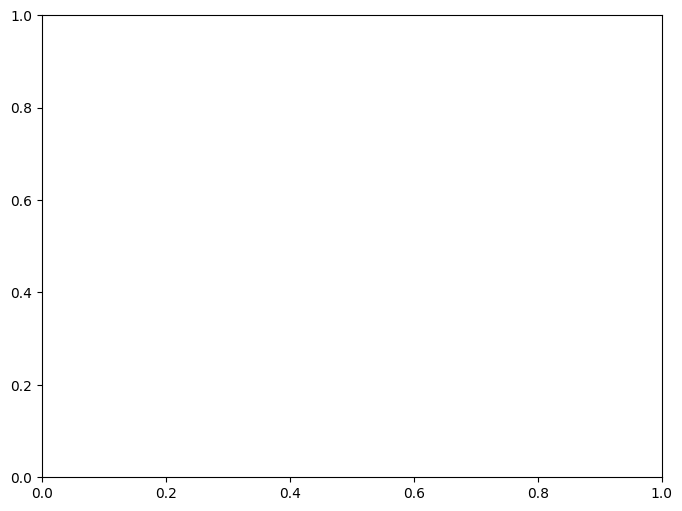

In [7]:
import numpy as np
import matplotlib.pyplot as plt

evolve_strategy = ["ring", "multikuti", "master_slave", "gga"]
num_runs = 5# Number of runs to perform

convergence_values = []

for i in evolve_strategy:
    values = []
    for _ in range(num_runs):
        ga = IslandGGA(data=data.train_data,K=4, num_islands=4, m_iter=10, num_iter=75, pSize=50, r_cross=0.4, r_mut=0.1,
                       strategies=data.strategies, evolve_strategy=i)
        ga.evolve()
        values.append(ga.convergence_values)
    convergence_values.append(np.mean(values, axis=0))  # Average convergence values across runs

# Plot the convergence values for each evolutionary strategy
plt.figure(figsize=(8, 6))
for i in range(len(evolve_strategy)):
    if evolve_strategy[i] =='gga':
        l = "Previous"
    else:
        l ='Proposed ' + str(evolve_strategy[i]).capitalize()
    plt.plot(np.arange(1, 101), convergence_values[i], label=l)
plt.xlabel('Iteration')
plt.ylabel('Convergence value')
plt.title('Convergence values for Proposed Methods')
plt.legend()
plt.show()


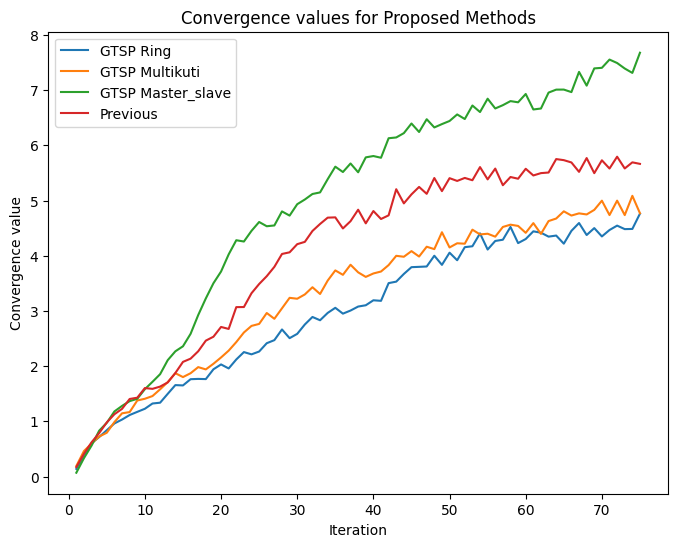

In [10]:
# Plot the convergence values for each evolutionary strategy
plt.figure(figsize=(8, 6))
for i in range(len(evolve_strategy)):
    if evolve_strategy[i] =='gga':
        l = "Previous"
    else:
        l ='GTSP ' + str(evolve_strategy[i]).capitalize()
    plt.plot(np.arange(1, 76), convergence_values[i], label=l)
plt.xlabel('Iteration')
plt.ylabel('Convergence value')
plt.title('Convergence values for Proposed Methods')
plt.legend()
plt.show()

In [8]:
ga.globalBest.weights
print(ga.globalBest.wb)

0.7356219397587946
